In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

**Importing the dataset**

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
print(df.shape)
df.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df = df.drop_duplicates()

In [6]:
# Deleting unwanted columns based on problem statement
del df["User ID"]
del df["Gender"]

In [7]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


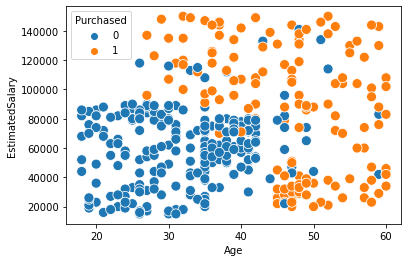

In [8]:
sns.scatterplot(data=df,x="Age",y="EstimatedSalary",hue="Purchased",s=100)
plt.show()

- Users aged 40 and above have a higher tendency to purchase a SUV car
- Also users earning an estimated salary greater than 90000 prefer to purchase a SUV car

<AxesSubplot:>

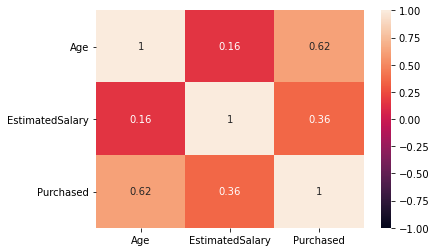

In [9]:
sns.heatmap(df.corr(),annot = True,vmin=-1)

- Age has a very good correlation of 0.62 with Purchased. Therefore it is an important feature

**Splitting the dataset into the Training set and Test set**

In [10]:
X = df[["Age","EstimatedSalary"]].values
y = df["Purchased"].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)

X_train.shape,X_test.shape

((280, 2), (120, 2))

**Feature Scaling**

In [11]:
#scaler  = StandardScaler()
#scaled_X_train = scaler.fit_transform(X_train) 

#X_train = scaler.transform(X_train)
#X_test  = scaler.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [12]:
from sklearn.tree import DecisionTreeClassifier

#dt = DecisionTreeClassifier() #default criterion="gini" #more efficient since range 0 - 0.5
dt = DecisionTreeClassifier(criterion="entropy",random_state = 0)           #range 0 - 1
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [13]:
#y_pred = dt.predict(X_train)

In [14]:
dt.tree_.max_depth   # dt.tree_.node_count

10

   Accuracy for entropy method:
   Depth  Cross Validaton Score
0      1               0.839286
1      2               0.892857
2      3               0.885714
3      4               0.867857
4      5               0.867857
5      6               0.842857
6      7               0.867857
7      8               0.850000
8      9               0.846429
9     10               0.850000


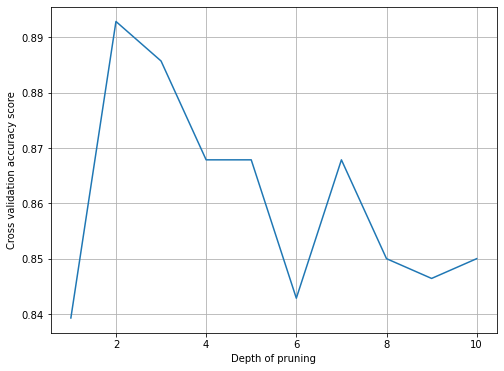

In [19]:
from sklearn.model_selection import cross_val_score

#pre pruning trial 
depth=np.arange(1,11)
accuracy=[] #cross validation accuracy 
for i in range(1,11):
  dt_1 = DecisionTreeClassifier(criterion="entropy",random_state=0, max_depth =i)
  scores = cross_val_score(dt_1,X_train,y_train,cv=5,scoring='accuracy')
  accuracy.append(scores.mean()) 

df_accuracy= pd.DataFrame({'Depth': depth, 'Cross Validaton Score':accuracy})
print("   Accuracy for entropy method:")
print(df_accuracy)

plt.figure(figsize=(8,6))
plt.plot(depth,accuracy)
plt.xlabel('Depth of pruning')
plt.ylabel('Cross validation accuracy score')
plt.grid(True)
plt.show()

- From hit and trial, we found max_depth = 2 is the best value of hyper parameter and has the highest cross validation score.

**Predicting the Test set results**

In [20]:
dt = DecisionTreeClassifier(criterion="entropy",random_state = 0,max_depth=2) 
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [21]:
y_pred = dt.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [22]:
df_pred = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_pred

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
115,0,0
116,1,1
117,0,0
118,1,1


**Making the Confusion Matrix**

In [23]:
from sklearn.metrics import confusion_matrix,plot_roc_curve,ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
cm

array([[66,  4],
       [ 5, 45]], dtype=int64)

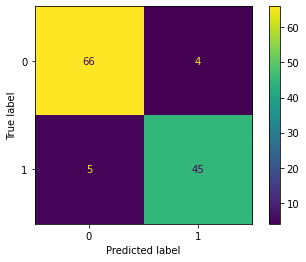

In [24]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.show()

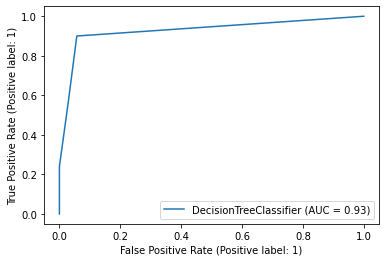

In [25]:
# ROC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt,X_test,y_test)

- AUC score is 0.93 . Generally AUC score 1 represents a perfect classifier and 0.5 represents a worthless classifier

**Visualising the results**

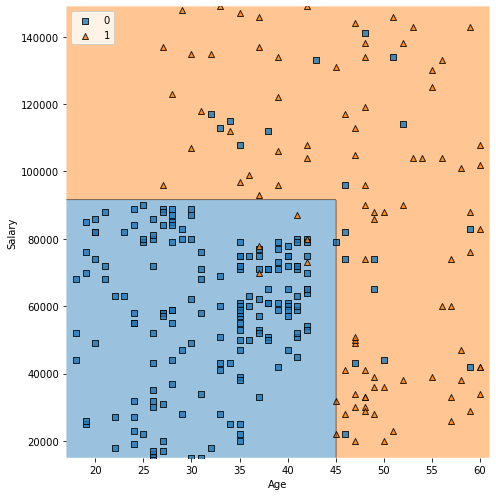

In [26]:
#Training set result decision boundary

from mlxtend.plotting import plot_decision_regions
 
#X_combined = np.vstack((X_train, X_test))
#y_combined = np.hstack((y_train, y_test))
 
fig, ax = plt.subplots(figsize=(7, 7))
plot_decision_regions(X_train, y_train, clf=dt)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

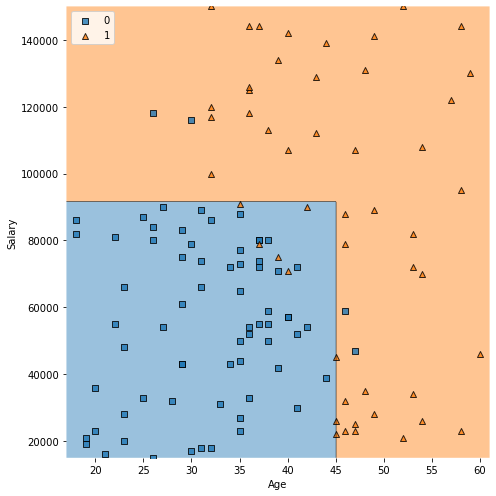

In [27]:
#Test set result decision boundary

from mlxtend.plotting import plot_decision_regions
 
fig, ax = plt.subplots(figsize=(7, 7))
plot_decision_regions(X_test, y_test, clf=dt)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

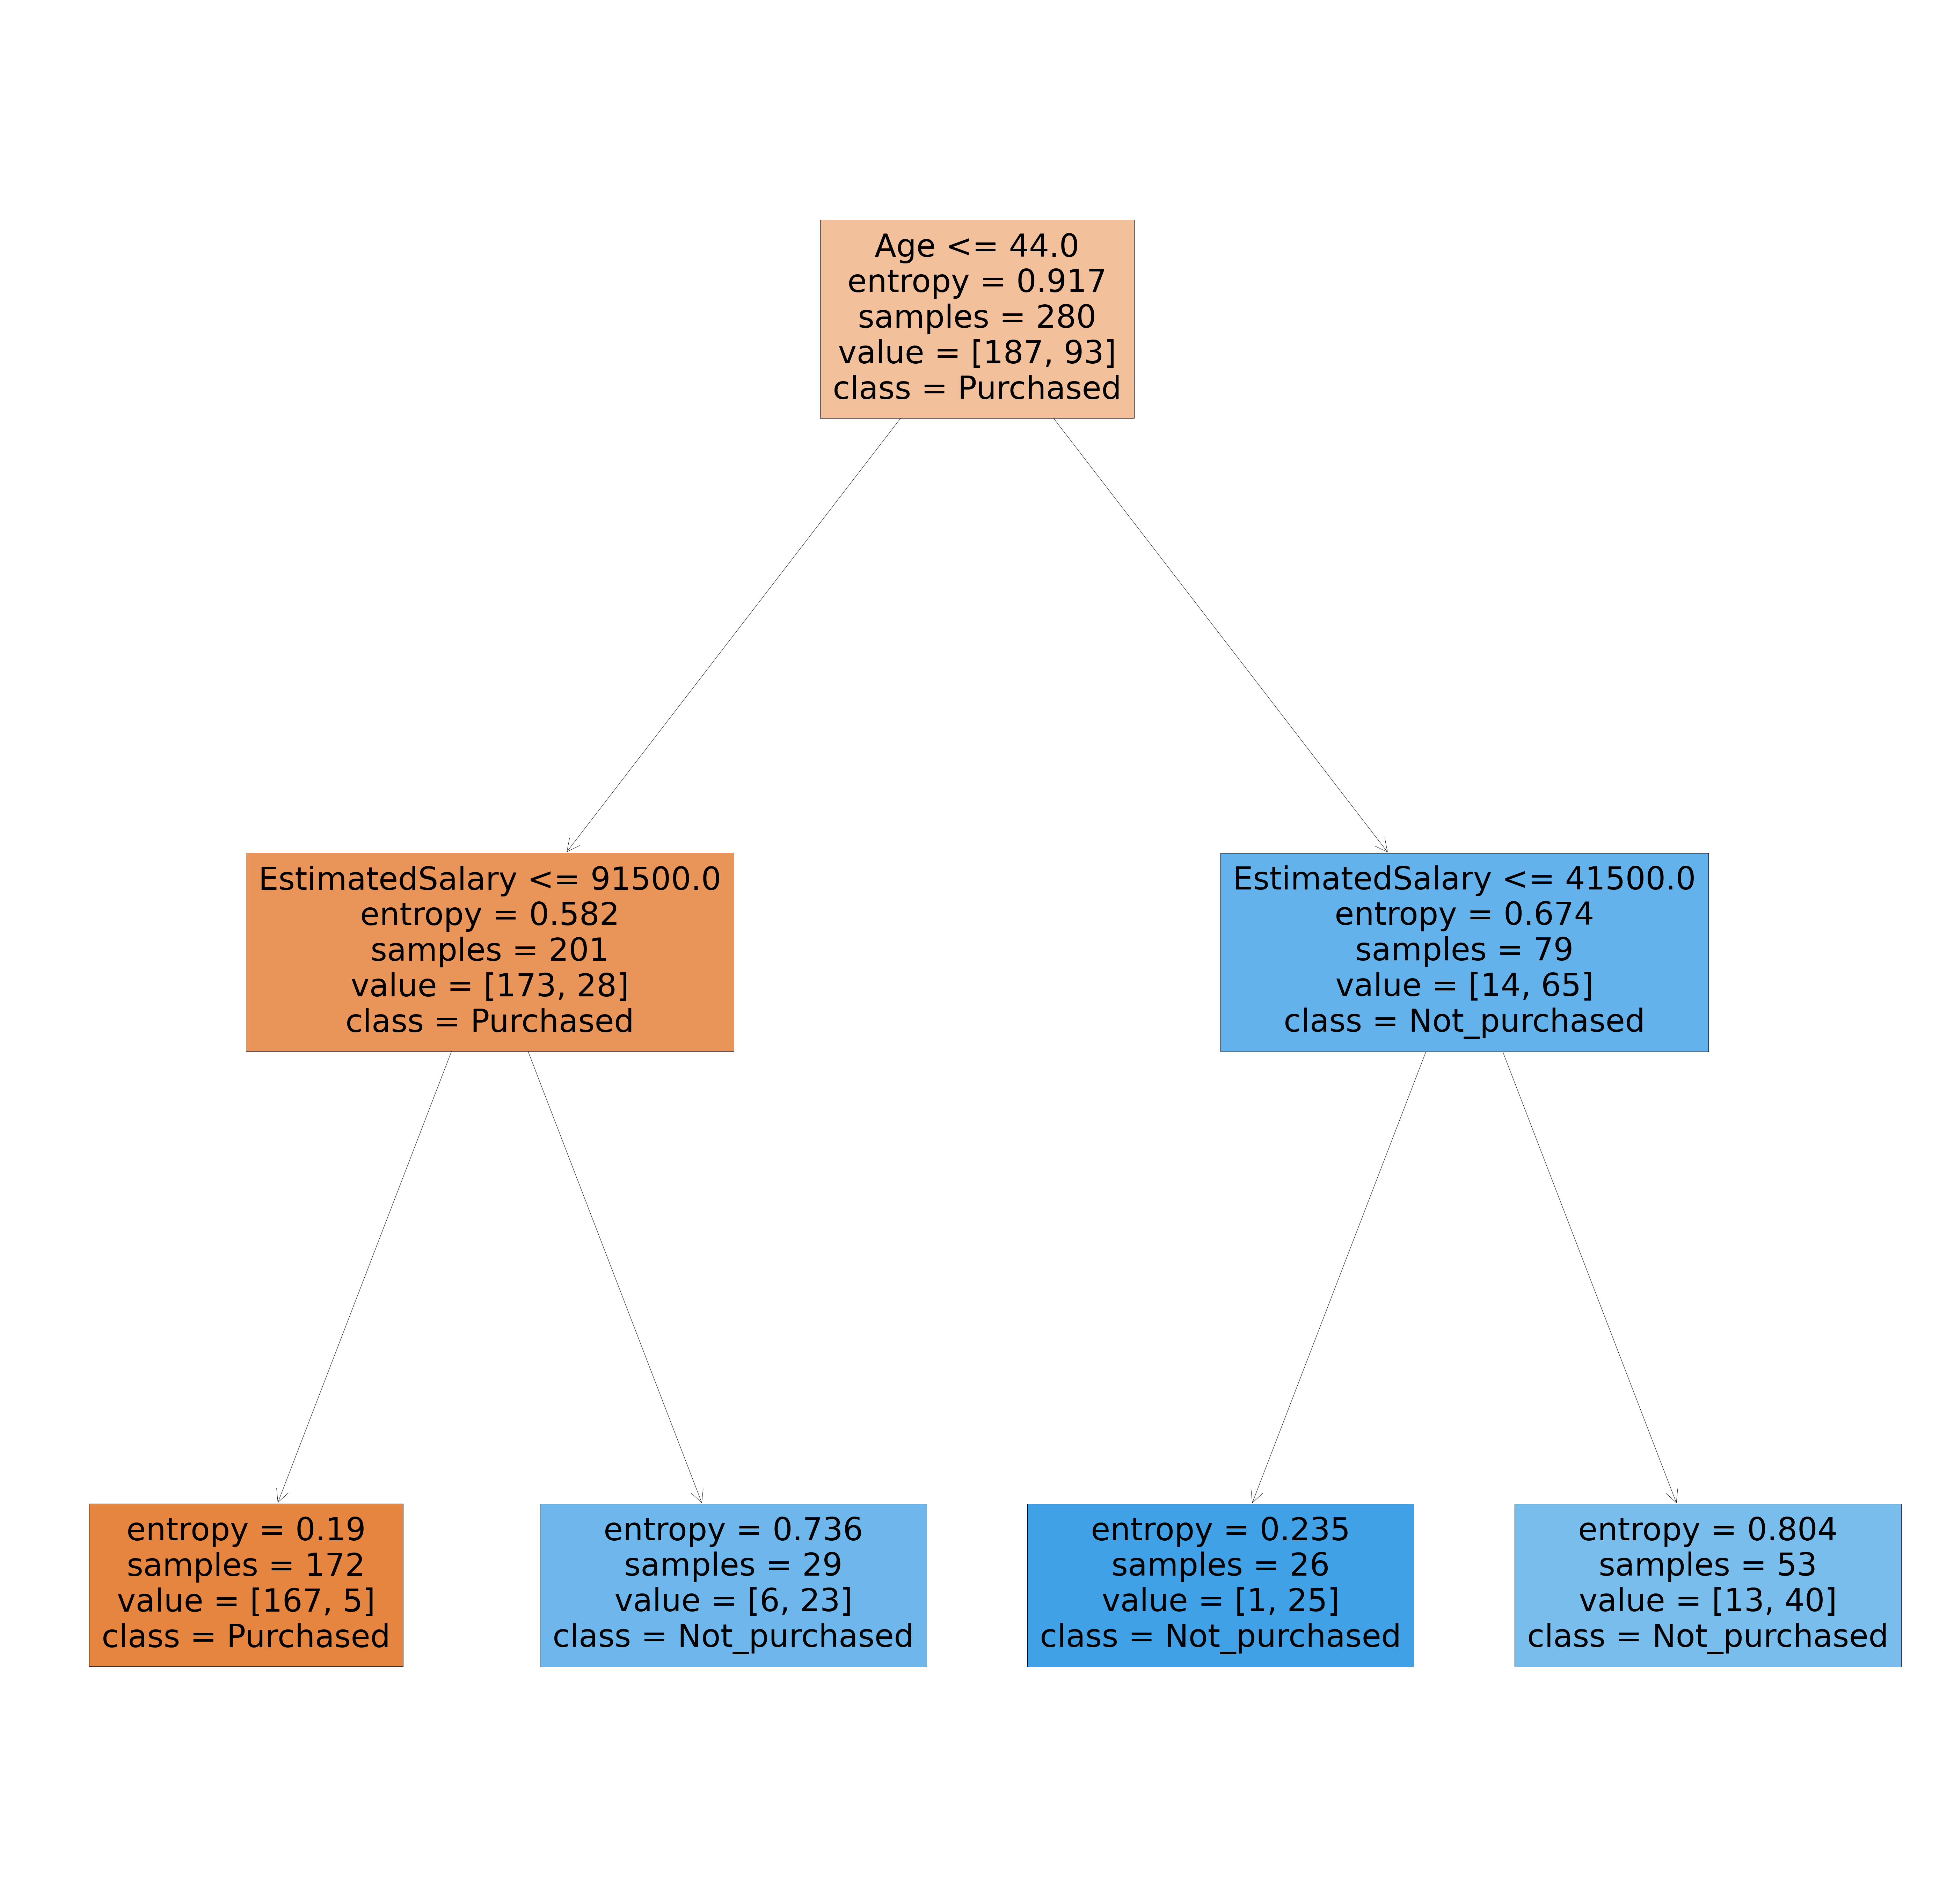

In [28]:
from sklearn import tree
#tree.plot_tree(dt)
plt.figure(figsize=(100,100))
features = df[["Age","EstimatedSalary"]].columns
classes = ['Purchased','Not_purchased']
tree.plot_tree(dt,feature_names=features,class_names=classes,filled=True)
plt.show()